In [13]:
#Importing Libraries
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score         #For Model Evaluation

In [14]:
#reading the dataset
df=pd.read_csv("CarPrice_Assignment.csv")


#checking if the data set has any null values
df.isnull().sum(axis=0)


#checking if the data set has duplicates

df.duplicated().sum(axis=0)


#Data Preparation:
#first extracting Company Name from the CarName columns
df['Company']=df.CarName.str.split(' ', expand=True)[0]



#Changing the value for column doornumber and cylindernumber to integers from strings
def doorn(a):
    if a=='two':
        return(2)
    else:
        return(4)
    
    
def cylndn(b):
    if b=='two':
        return(2)
    elif b=='three':
        return(3)
    elif b=='four':
        return(4)
    elif b=='five':
        return(5)
    elif b=='six':
        return(6)
    elif b=='eight':
        return(8)
    else:
        return(12)
        



#changing to the integer values from the strings
df['doorn']=df.doornumber.apply(doorn)
df['cylindern']=df.cylindernumber.apply(cylndn)



#creating a new df and making changes to them
#Dropping the Column CarName
df1=df


#Dropping some of the columns
df1.drop('doornumber',axis=1, inplace=True)
df1.drop('cylindernumber', axis=1, inplace=True)
df1.drop('car_ID', axis=1, inplace=True)
df1.drop('CarName', axis=1, inplace=True)



#checking the uniqueness of company names
list(df1.Company.unique())



#correcting the company names:
df1.loc[(df1.Company=='maxda'),'Company']='mazda'
df1.loc[(df1.Company=='Nissan'),'Company']='nissan'
df1.loc[(df1.Company=='porcshce'),'Company']='porsche'
df1.loc[(df1.Company=='toyouta'),'Company']='toyota'
df1.loc[(df1.Company=='vokswagen'),'Company']='volkswagen'
df1.loc[(df1.Company=='vw'),'Company']='volkswagen'


# Get the dummy variables for the feature 'Drivewheel' and store it in a new variable - 'gd'
#dropping 4wd
gd=pd.get_dummies(df1.drivewheel, drop_first=True)
df1=pd.concat([gd,df1],axis=1)
df1.drop('drivewheel', axis=1, inplace=True)



# Get the dummy variables for the feature 'Carbody' and store it in a new variable - 'gd'
gd=pd.get_dummies(df1.carbody, drop_first=True)
df1=pd.concat([gd,df1],axis=1)
df1.drop('carbody', axis=1, inplace=True)


# Get the dummy variables for the feature 'enginetype' and store it in a new variable - 'gd'
gd=pd.get_dummies(df1.enginetype, drop_first=True)
df1=pd.concat([gd,df1],axis=1)
df1.drop('enginetype', axis=1, inplace=True)


# Get the dummy variables for the feature 'fuelsystem' and store it in a new variable - 'gd'
#dropping
gd=pd.get_dummies(df1.fuelsystem, drop_first=True)
df1=pd.concat([gd,df1],axis=1)
df1.drop('fuelsystem', axis=1, inplace=True)



# Get the dummy variables for the feature 'aspiration' and store it in a new variable - 'gd'
#dropping std
gd=pd.get_dummies(df1.aspiration, drop_first=True)
df1=pd.concat([gd,df1],axis=1)
df1.drop('aspiration', axis=1, inplace=True)


# Get the dummy variables for the feature 'enginelocation' and store it in a new variable - 'gd'
#dropping front
gd=pd.get_dummies(df1.enginelocation, drop_first=True)
df1=pd.concat([gd,df1],axis=1)
df1.drop('enginelocation', axis=1, inplace=True)


# Get the dummy variables for the feature 'Company' and store it in a new variable - 'gd'
#dropping front
gd=pd.get_dummies(df1.Company, drop_first=True)
df1=pd.concat([gd,df1],axis=1)
df1.drop('Company', axis=1, inplace=True)



# Get the dummy variables for the feature 'Fueltype' and store it in a new variable - 'gd'
#dropping front
gd=pd.get_dummies(df1.fueltype, drop_first=True)
df1=pd.concat([gd,df1],axis=1)
df1.drop('fueltype', axis=1, inplace=True)

'''
sns.pairplot(df1)
plt.show()
'''




'\nsns.pairplot(df1)\nplt.show()\n'

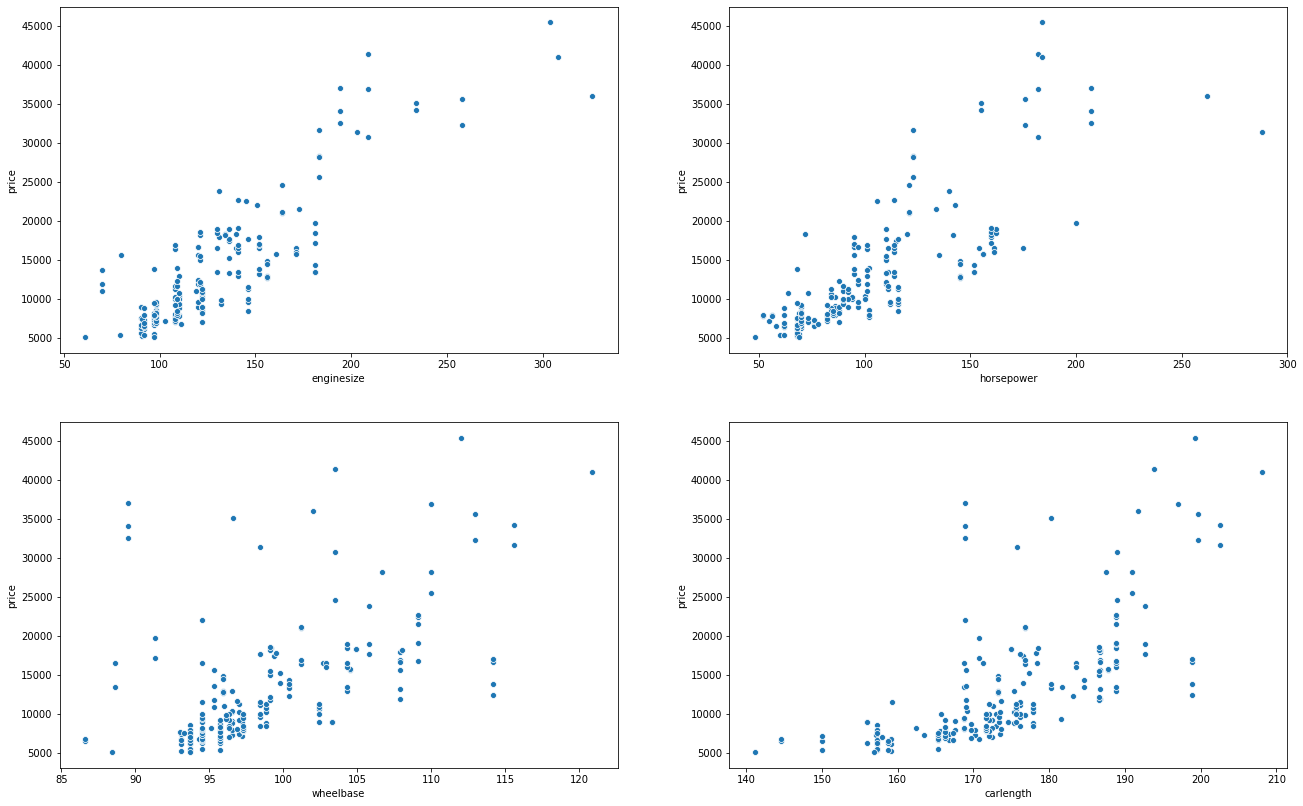

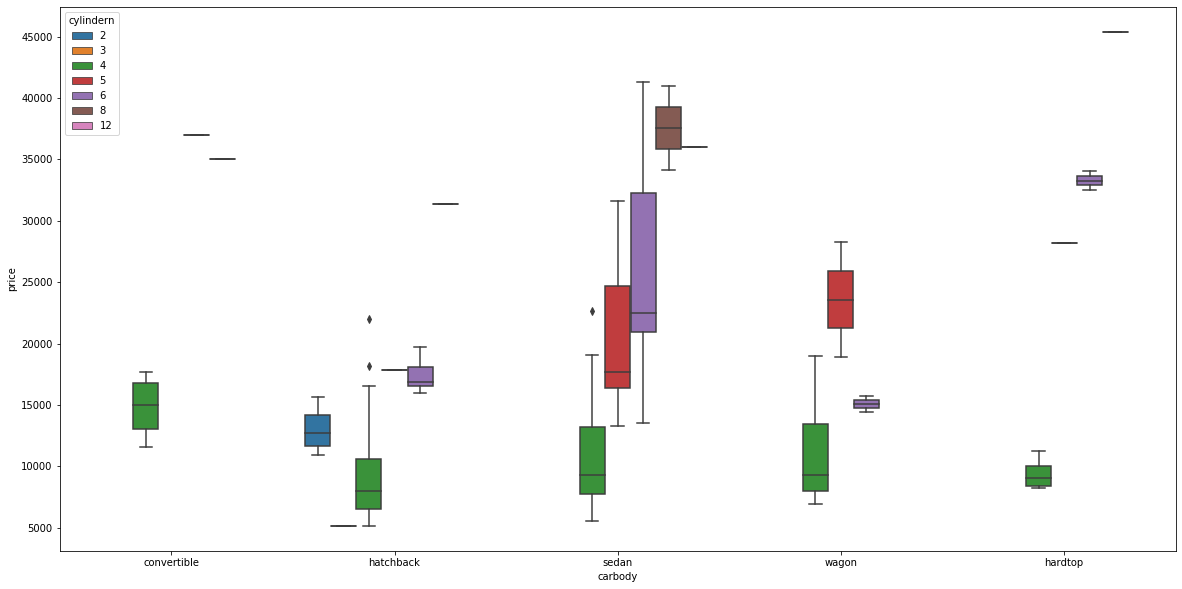

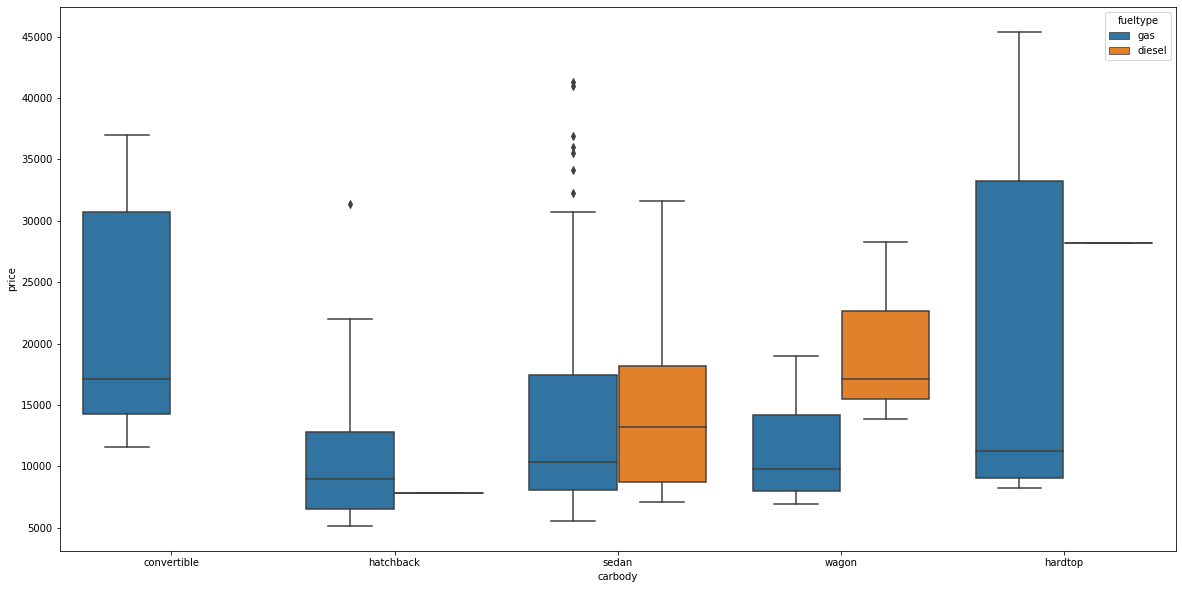

C:\Users\garvi\anaconda3\lib\site-packages\ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\garvi\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


     gas  audi  bmw  buick  chevrolet  dodge  honda  isuzu  jaguar  mazda  \
122    1     0    0      0          0      0      0      0       0      0   
125    1     0    0      0          0      0      0      0       0      0   
166    1     0    0      0          0      0      0      0       0      0   
1      1     0    0      0          0      0      0      0       0      0   
199    1     0    0      0          0      0      0      0       0      0   

     ...  boreratio    stroke  compressionratio  horsepower   peakrpm  \
122  ...   0.230159  0.525253           0.15000    0.083333  0.551020   
125  ...   1.000000  0.464646           0.15625    0.395833  0.551020   
166  ...   0.444444  0.449495           0.15000    0.266667  1.000000   
1    ...   0.626984  0.247475           0.12500    0.262500  0.346939   
199  ...   0.746032  0.484848           0.03125    0.475000  0.387755   

      citympg  highwaympg     price  doorn  cylindern  
122  0.500000    0.567568  0.068818      4

In [ ]:
plt.figure(figsize=(22, 14))
plt.subplot(2,2,1)
sns.scatterplot(x = 'enginesize', y = 'price', data = df1)
plt.subplot(2,2,2)
sns.scatterplot(x = 'horsepower', y = 'price', data = df1)
plt.subplot(2,2,3)
sns.scatterplot(x = 'wheelbase', y = 'price', data = df1)
plt.subplot(2,2,4)
sns.scatterplot(x = 'carlength', y = 'price', data = df1)

plt.show()



plt.figure(figsize = (20, 10))
sns.boxplot(x = 'carbody', y = 'price', hue = 'cylindern', data = df)
plt.show()



plt.figure(figsize = (20, 10))
sns.boxplot(x = 'carbody', y = 'price', hue = 'fueltype', data = df)
plt.show()


#importing Scikit learn library for modelling
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(df1, train_size = 0.7, test_size = 0.3, random_state = 100)



#importing MinMaxScarler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()



# Applying scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 
            'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price','symboling']



df_train[num_vars] = scaler.fit_transform(df_train[num_vars])



print(df_train.head())


print(df_train.describe())


plt.figure(figsize = (32, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()



plt.figure(figsize=[6,6])
plt.scatter(df_train.enginesize, df_train.price)
plt.show()


y_train = df_train.pop('price')
X_train = df_train



#importing statsmodel
import statsmodels.api as sm

# Adding a constant
X_train_lm = sm.add_constant(X_train[['horsepower']])
lr = sm.OLS(y_train, X_train_lm).fit()



lr.params


plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], -0.0194 + 1.050*X_train_lm.iloc[:, 1], 'r')
plt.show()




print(lr.summary())



#Addding most of the variables/features
X_train_lm = X_train[['horsepower','enginesize', 'rear', 'turbo', '2bbl', '4bbl','wheelbase', 'carlength', 'carwidth', 'idi'
                      ,'mfi', 'mpfi','spdi','spfi','dohcv','l','ohcf','ohcv','hardtop','hatchback','sedan','wagon','fwd','rwd','boreratio','curbweight','stroke','compressionratio','peakrpm','citympg',
                      'highwaympg','doorn','cylindern','gas','audi','bmw','buick','chevrolet','dodge','honda','isuzu','jaguar','mazda','mercury',
                      'mitsubishi','nissan','peugeot','plymouth','porsche','renault','saab','subaru','toyota','volkswagen','volvo','symboling']]



import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params


# Check the summary
print(lr.summary())


# Checking for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor



vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif



#Turbo happens to be out of p-value range, so removing as its insignificant
X=X_train_lm.drop('rear',1)
X_train_lm = sm.add_constant(X)
lr_2 = sm.OLS(y_train, X_train_lm).fit()
print(lr_2.summary())


vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


#2bbl happens to be out of p-value range, so removing as its insignificant
X=X_train_lm.drop('idi',1)
X_train_lm = sm.add_constant(X)
lr_2 = sm.OLS(y_train, X_train_lm).fit()
print(lr_2.summary())



vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif
#4bbl happens to be out of p-value range, so removing as its insignificant
X=X_train_lm.drop('enginesize',1)
X_train_lm = sm.add_constant(X)
lr_3 = sm.OLS(y_train, X_train_lm).fit()
print(lr_3.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif




X=X_train_lm.drop('gas',1)
X_train_lm = sm.add_constant(X)
lr_4 = sm.OLS(y_train, X_train_lm).fit()
print(lr_4.summary())



vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif



X=X_train_lm.drop('subaru',1)

# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_36 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_36.summary())


vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif



X=X_train_lm.drop('mpfi',1)
X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()
print(lr_5.summary())





In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif



X=X_train_lm.drop('citympg',1)
X_train_lm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_lm).fit()
print(lr_6.summary())




vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif



X=X_train_lm.drop('curbweight',1)
X_train_lm = sm.add_constant(X)

lr_7 = sm.OLS(y_train, X_train_lm).fit()

print(lr_7.summary())



vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif




X=X_train_lm.drop('horsepower',1)
X_train_lm = sm.add_constant(X)

lr_8 = sm.OLS(y_train, X_train_lm).fit()

print(lr_8.summary())



vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif



X=X_train_lm.drop('sedan',1)

X_train_lm = sm.add_constant(X)

lr_9 = sm.OLS(y_train, X_train_lm).fit()

print(lr_9.summary())



vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif




X=X_train_lm.drop('carlength',1)

# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_10 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_10.summary())



vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif




X=X_train_lm.drop('peugeot',1)

# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_11 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_11.summary())



vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif



X=X_train_lm.drop('carwidth',1)

# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_12 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_12.summary())



vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif



X=X_train_lm.drop('rwd',1)

# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_13 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_13.summary())




vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif



X=X_train_lm.drop('highwaympg',1)

# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_14 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_14.summary())


vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


X=X_train_lm.drop('toyota',1)

# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_15 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_15.summary())




vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif



X=X_train_lm.drop('wheelbase',1)

# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_16 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_16.summary())


vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif




X=X_train_lm.drop('cylindern',1)

# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_17 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_17.summary())



vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif



y_train_price = lr_17.predict(X_train_lm)



# Plotting the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)       


#Fitting the test data for predictions

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])



df_test.describe()




y_test = df_test.pop('price')
X_test = df_test



#Adding Constant
X_test_m4 = sm.add_constant(X_test)



X_train_lm.columns



#Choosing the columns we need for testing
X_test_m5=X_test_m4[['const', 'turbo', '2bbl', '4bbl', 'mfi', 'spdi', 'spfi', 'dohcv', 'l',
       'ohcf', 'ohcv', 'hardtop', 'hatchback', 'wagon', 'fwd', 'boreratio',
       'stroke', 'compressionratio', 'peakrpm', 'doorn', 'audi', 'bmw',
       'buick', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda',
       'mercury', 'mitsubishi', 'nissan', 'plymouth', 'porsche', 'renault',
       'saab', 'volkswagen', 'volvo', 'symboling']].copy()


y_pred_m5 = lr_17.predict(X_test_m5)


## Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  


print(lr_17.summary())
print(r2_score(y_test, y_pred_m5))